In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [103]:
df=pd.read_excel('D:/Megha/Desktop/DS assignments/Assignment 18 Forecasting/Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [104]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [105]:
df['year'] = pd.DatetimeIndex(df['Month']).year
df['month'] = pd.DatetimeIndex(df['Month']).month
df

,Month,Passengers,year,month
0,1995-01-01,112,1995,1
1,1995-02-01,118,1995,2
2,1995-03-01,132,1995,3
3,1995-04-01,129,1995,4
4,1995-05-01,121,1995,5
...,...,...,...,...
91,2002-08-01,405,2002,8
92,2002-09-01,355,2002,9
93,2002-10-01,306,2002,10
94,2002-11-01,271,2002,11


In [106]:
df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace=True)

In [107]:
df.drop('Month',axis=1,inplace=True)
df

,Passengers,year,month
0,112,1995,Jan
1,118,1995,Feb
2,132,1995,Mar
3,129,1995,Apr
4,121,1995,May
...,...,...,...
91,405,2002,Aug
92,355,2002,Sept
93,306,2002,Oct
94,271,2002,Nov


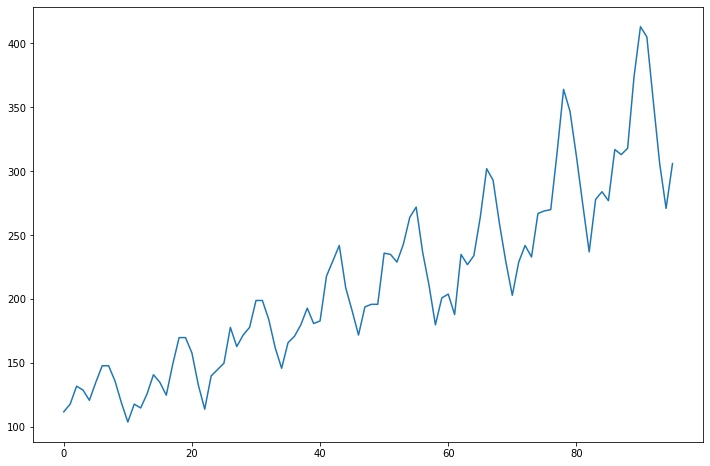

In [108]:
plt.figure(figsize=(12,8))
plt.plot(df['Passengers'])

<AxesSubplot:xlabel='month', ylabel='Passengers'>

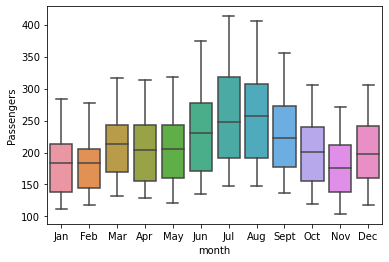

In [109]:
sns.boxplot(x='month',y='Passengers',data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

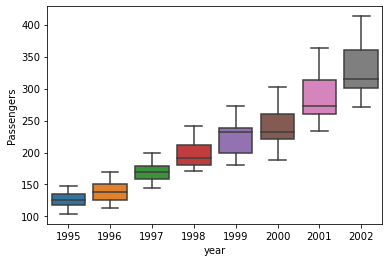

In [110]:
sns.boxplot(x='year',y='Passengers',data=df)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

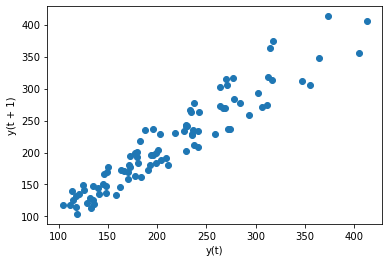

In [111]:
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])

<AxesSubplot:xlabel='year', ylabel='Passengers'>

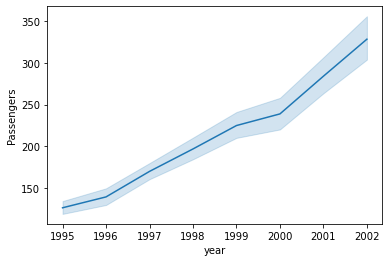

In [112]:
sns.lineplot(x='year',y='Passengers',data=df)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

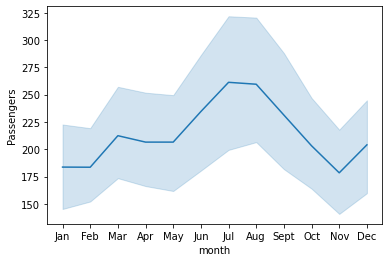

In [113]:
sns.lineplot(x='month',y='Passengers',data=df)

<AxesSubplot:xlabel='month', ylabel='year'>

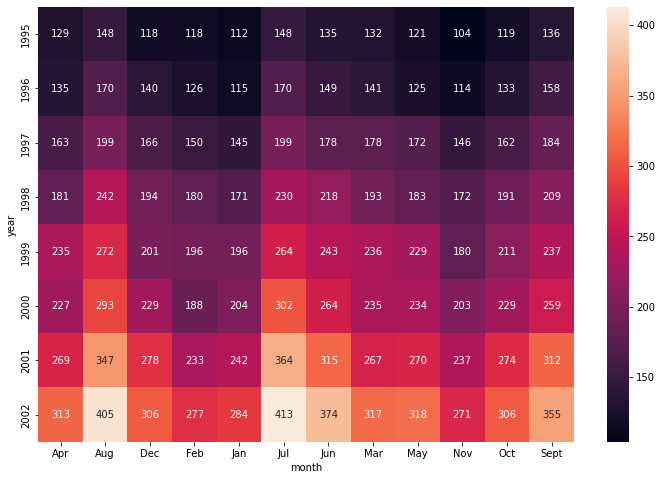

In [114]:
plt.figure(figsize=(12,8))
heat_map=pd.pivot_table(data=df,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heat_map,annot=True,fmt='g')

In [115]:
month_dummy=pd.DataFrame(pd.get_dummies(df['month']))
df = pd.concat([df,month_dummy],axis = 1)
df

,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,112,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,118,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,132,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,129,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,121,1995,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,2002,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,355,2002,Sept,0,0,0,0,0,0,0,0,0,0,0,1
93,306,2002,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,271,2002,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [116]:
df_train=df.head(65)
df_train

,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,112,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,118,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,132,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,129,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,121,1995,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,204,2000,Jan,0,0,0,0,1,0,0,0,0,0,0,0
61,188,2000,Feb,0,0,0,1,0,0,0,0,0,0,0,0
62,235,2000,Mar,0,0,0,0,0,0,0,1,0,0,0,0
63,227,2000,Apr,1,0,0,0,0,0,0,0,0,0,0,0


In [117]:
df_test=df.tail(31)
df_test

,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
65,264,2000,Jun,0,0,0,0,0,0,1,0,0,0,0,0
66,302,2000,Jul,0,0,0,0,0,1,0,0,0,0,0,0
67,293,2000,Aug,0,1,0,0,0,0,0,0,0,0,0,0
68,259,2000,Sept,0,0,0,0,0,0,0,0,0,0,0,1
69,229,2000,Oct,0,0,0,0,0,0,0,0,0,0,1,0
70,203,2000,Nov,0,0,0,0,0,0,0,0,0,1,0,0
71,229,2000,Dec,0,0,1,0,0,0,0,0,0,0,0,0
72,242,2001,Jan,0,0,0,0,1,0,0,0,0,0,0,0
73,233,2001,Feb,0,0,0,1,0,0,0,0,0,0,0,0
74,267,2001,Mar,0,0,0,0,0,0,0,1,0,0,0,0


C:\Users\Megha\AppData\Local\Temp/ipykernel_14264/1359483796.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  dec_ts=seasonal_decompose(df.Passengers,freq=12)


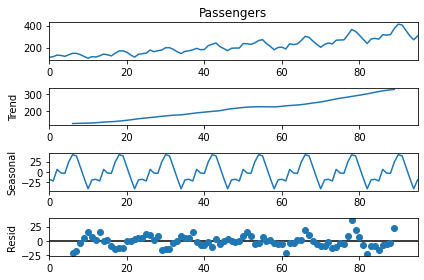

In [118]:
# Time series decomposition plot
dec_ts=seasonal_decompose(df.Passengers,freq=12)
dec_ts.plot()
plt.show()

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


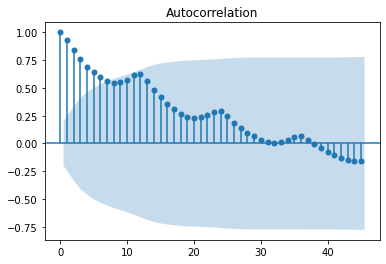

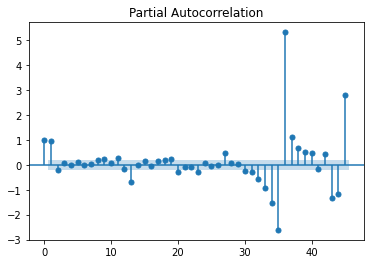

In [119]:
#ACF and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=45)
tsa_plots.plot_pacf(df.Passengers,lags=45)
plt.show()

In [120]:
#Data based forecasting

In [121]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rsme(org,pred):
    temp=sqrt(mean_squared_error(org, pred)) 
    return temp

In [122]:
#Simple exponential method
ses_model=SimpleExpSmoothing(df_train['Passengers']).fit()
pred_ses=ses_model.predict(start=df_test.index[0],end=df_test.index[-1])
rsme(df_test.Passengers,pred_ses)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


78.69295176672023

In [123]:
#Holt method
hw=Holt(df_train['Passengers']).fit()
prd_hw=hw.predict(start=df_test.index[0],end=df_test.index[-1])
rsme(prd_hw,df_test.Passengers)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


52.42120111296908

In [124]:
#holt winters exponential smoothing with additive seasonality and additive trend
hwa=ExponentialSmoothing(df_train['Passengers'],seasonal='add',trend='add',seasonal_periods=16).fit()
pred_hwa=hwa.predict(start=df_test.index[0],end=df_test.index[-1])
rsme(pred_hwa,df_test.Passengers)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


51.25187921770884

In [125]:
#holt winters exponential smoothing with multiplicative seasonality and additive trend
hwm=ExponentialSmoothing(df_train['Passengers'],seasonal='mul',trend='add',seasonal_periods=16).fit()
pred_hwm=hwm.predict(start=df_test.index[0],end=df_test.index[-1])
rsme(pred_hwm,df_test.Passengers)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


52.3248367296754

In [126]:
#Model based forecasting

In [127]:
df['t']=np.arange(1,97)
df['t_sq']=df['t']*df['t']
df['log_pass']=np.log(df['Passengers'])
df

,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,t,t_sq,log_pass
0,112,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,1995,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,2002,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,2002,Sept,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,2002,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,2002,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [128]:
df_tr=df.head(65)
df_tr

,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,t,t_sq,log_pass
0,112,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,1995,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,204,2000,Jan,0,0,0,0,1,0,0,0,0,0,0,0,61,3721,5.318120
61,188,2000,Feb,0,0,0,1,0,0,0,0,0,0,0,0,62,3844,5.236442
62,235,2000,Mar,0,0,0,0,0,0,0,1,0,0,0,0,63,3969,5.459586
63,227,2000,Apr,1,0,0,0,0,0,0,0,0,0,0,0,64,4096,5.424950


In [129]:
df_te=df.tail(31)
df_te

,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,t,t_sq,log_pass
65,264,2000,Jun,0,0,0,0,0,0,1,0,0,0,0,0,66,4356,5.575949
66,302,2000,Jul,0,0,0,0,0,1,0,0,0,0,0,0,67,4489,5.710427
67,293,2000,Aug,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,259,2000,Sept,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828
69,229,2000,Oct,0,0,0,0,0,0,0,0,0,0,1,0,70,4900,5.433722
70,203,2000,Nov,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206
71,229,2000,Dec,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,242,2001,Jan,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,233,2001,Feb,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,267,2001,Mar,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249


In [130]:
# linear model
import statsmodels.formula.api as smf
lm=smf.ols('Passengers~t',data=df_tr).fit()
pred_lm=pd.Series(lm.predict(pd.DataFrame(df_te['t'])))
rsme(pred_lm,df_te['Passengers'])

50.61903311557763

In [131]:
#exp model
exp=smf.ols('log_pass~t',data=df_tr).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(df_te['t'])))
rsme(pred_exp,df_te['Passengers'])

293.0759994281998

In [132]:
#quadratic model
quad=smf.ols('Passengers~t_sq',data=df_tr).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(df_te['t_sq'])))
rsme(pred_quad,df_te['Passengers'])

48.38748574036407

In [133]:
#additive seasonality model
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sept+Oct+Nov+Dec',data=df_tr).fit()
pred_add_sea = pd.Series(add_sea.predict(df_te[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']]))
rsme(pred_add_sea,df_te['Passengers'])

124.62335225917893

In [134]:
#additive quad seasonality model
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sept+Oct+Nov+Dec',data=df_tr).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(df_te[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','t','t_sq']]))
rsme(pred_add_sea_quad,df_te['Passengers'])

35.7735549591155

In [135]:
#multiplicative seasonality model
mul_sea_Quad = smf.ols('log_pass~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sept+Oct+Nov+Dec',data=df_tr).fit()
pred_mul_sea_quad = pd.Series(mul_sea_Quad.predict(df_te[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']]))
rsme(pred_mul_sea_quad,df_te['Passengers'])

293.6000142207875

In [136]:
#multiplicative additive seasonality model
Mul_Add_sea = smf.ols('log_pass~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sept+Oct+Nov+Dec',data = df_tr).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(df_te))
rsme(pred_Mult_add_sea,df_te['Passengers'])

293.0423588240752

In [137]:
list=[['Simple Exponential Method',rsme(pred_ses,df_test.Passengers)],['Holt Method',rsme(prd_hw,df_test.Passengers)],['Holt-winters exp smoothing with additive T&S',rsme(pred_hwa,df_test.Passengers)],['Holt-winters exp smoothing with mul S and add T',rsme(pred_hwm,df_test.Passengers)],['linear model',rsme(pred_lm,df_te['Passengers'])],['quadratic model',rsme(pred_quad,df_te['Passengers'])],['exponential model',rsme(pred_exp,df_te['Passengers'])],['additive quad S model',rsme(pred_add_sea_quad,df_te['Passengers'])],['mult S model',rsme(pred_mul_sea_quad,df_te['Passengers'])],['mas model',rsme(pred_Mult_add_sea,df_te['Passengers'])],['add s model',rsme(pred_add_sea,df_te['Passengers'])]]

In [138]:
res = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
res

,Model,RMSE_Value
0,Simple Exponential Method,78.692952
1,Holt Method,52.421201
2,Holt-winters exp smoothing with additive T&S,51.251879
3,Holt-winters exp smoothing with mul S and add T,52.324837
4,linear model,50.619033
5,quadratic model,48.387486
6,exponential model,293.075999
7,additive quad S model,35.773555
8,mult S model,293.600014
9,mas model,293.042359


In [139]:
#least rsme is for additive seasonal quadratic model

In [140]:
final = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sept+Oct+Nov+Dec',data=df).fit()
pred_final = pd.Series(final.predict(df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','t','t_sq']]))
rsme(pred_final,df['Passengers'])

13.484378376693769

In [141]:
pred_df = pd.DataFrame({'Actual' : df.Passengers, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,112,101.802790
1,118,100.717631
2,132,128.632471
3,129,121.797312
4,121,120.837153
...,...,...
91,405,371.087153
92,355,343.797312
93,306,316.632471
94,271,292.842631


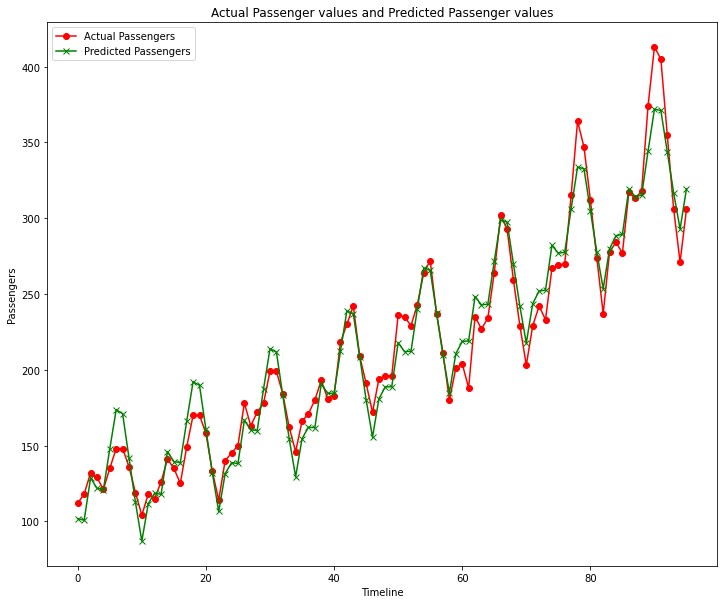

In [144]:
plt.plot(df.Passengers, color='r',marker='o', label='Actual Passengers')
plt.plot(pred_final, color='g',marker='x', label='Predicted Passengers')

# Added titles and adjust dimensions
plt.title('Actual Passenger values and Predicted Passenger values')
plt.xlabel("Timeline")
plt.ylabel("Passengers")
plt.legend()
plt.rcParams['figure.figsize'] = (16,10) 

plt.show()